# Importa librerias
Para este proyecto necesitaremos las siguentes librerias, estas fueron anexadas en el examen junto con otros valores.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

la nueva entre todas esun paquete estadistico para hacer una regresion lineal como linregress.

# Modulo de explicacion 

Tenemos una data del NOA que reporta los nuveles pormedios del mar desde 1880 hasta  2013, nos solicitan hacer dos pronosticos del los nivelos de mar, el primero de toda la data y el segundo del año 2000 hasta 2050.

Primero importamos los datos, sin mas.  

In [3]:
 df = pd.read_csv('epa-sea-level.csv')


Luego graficamos los datos usando el modo scatter, donde el eje de las abcisas  `Años` y en el de las ordenadas el ajuste del niver del mar de CSIRO `'CSIRO Adjusted Sea Level'`. esto se hacer con la función `scatter()` de matplotlib 


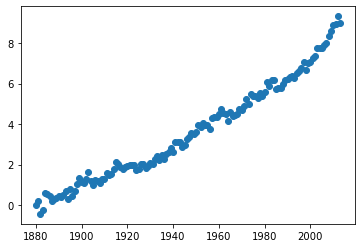

In [4]:
# Create scatter plot
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

apartir de los datos con la herramienta de `scipy` para regresion lineal, calculamos la pendiente y puntos de corte de los datos de modo que simulen una linea, por eso el nombre de regresión lineal. Ingresamos primero nuestras `x (Years)` y luego nuestras `y (CSIRO Adjusted Sea Level)`

In [5]:
fit1 = linregress(df['Year'],df['CSIRO Adjusted Sea Level'])

Luego hacemos la primera regresión lienal, Primero hacemos nuestro conjunto de datos para el año con `numpy.arange` desde 1880 con el `min` de la columna `Year`. hasta 2051, contando de 1 en 1. luego nuestro array para los datos ajustados en el nivel del mar se calculan a partir de la pendiente y el punto de corte que calculamos prviamente asignados a `fit1` 

In [6]:
xFlin , yFlin = [np.arange(df['Year'].min(),2051,1).tolist()
                     ,(np.arange(df['Year'].min(),2051,1)*fit1.slope + fit1.intercept).tolist()]

Al fina de cada conjuto de datos agregamos el método `.toloit()` porque necesitamos los datos si formato numpy.

Seguido, anexamos a nuestro scatter la línea de ajuste que acabamos de calcular. 

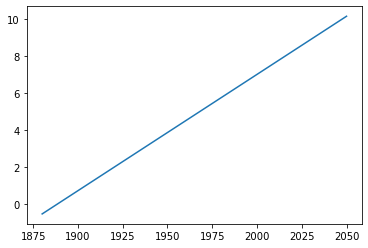

In [7]:
plt.plot(xFlin,yFlin)

_Nota : no se visualizan los datos sobre el scatter porque estamos explicando por separado cada caso, para visalizarlos necesitmaos ejecutar los dos comandos en una celta jupyter como veremos a continuacion._ 

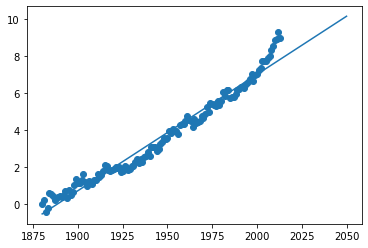

In [8]:
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.plot(xFlin,yFlin)

Luego hacemos el segundo fit que llamaremos `fit2` la grafica anterior se observa un cojunto de datos que se sale un poco de nuestra linea de ajuste.

Comenzamos escogiendo los datos a partir del año 2000 y lo asignamos a la variable `df_L2`

In [9]:
df_L2 = df[df['Year'] >= 2000]

Luego a este conjunto de datos le hacemos la otra regresion linea que mencionamos

In [10]:
fit2 = linregress(df_L2['Year'],df_L2['CSIRO Adjusted Sea Level'])

Creamos nuestro conjunto de datos para graficar la nueva liena de ajuste

In [11]:
xFlin2 , yFlin2 = [np.arange(2000,2051,1).tolist()
                       , (np.arange(2000,2051,1)*fit2.slope + fit2.intercept).tolist()]

Volvemos a graficar y listo. 

para hacer mas representavia vamos colocar todos nuestro plot junto con este nuevo en una celda.

Text(0.5, 0, 'Year')

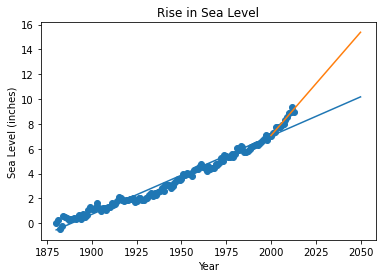

In [13]:
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.plot(xFlin,yFlin)
plt.plot(xFlin2,yFlin2)

plt.title('Rise in Sea Level')
plt.ylabel('Sea Level (inches)')
plt.xlabel('Year')

Por ultimpo cambiamos  Agregamos un titulo y cambiamos las etiquetas de nuestros ejes.

Todos estos datos lo colocamos dentro de un function para hacer mas comparto el cálculo

In [14]:
def draw_plot():
    # Read data from file
    
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

    # Create first line of best fit

    fit1 = linregress(df['Year'],df['CSIRO Adjusted Sea Level'])
    
    xFlin , yFlin = [np.arange(df['Year'].min(),2051,1).tolist()
                     ,(np.arange(df['Year'].min(),2051,1)*fit1.slope + fit1.intercept).tolist()]
    # Plot
    plt.plot(xFlin,yFlin)
    
    # Create second line of best fit
    
    # New DataFrame
    df_L2 = df[df['Year'] >= 2000]
    
    fit2 = linregress(df_L2['Year'],df_L2['CSIRO Adjusted Sea Level'])

    xFlin2 , yFlin2 = [np.arange(2000,2051,1).tolist()
                       , (np.arange(2000,2051,1)*fit2.slope + fit2.intercept).tolist()]
    # Plot
    plt.plot(xFlin2,yFlin2)
    
    # Add labels and title
    
    plt.title('Rise in Sea Level')
    plt.ylabel('Sea Level (inches)')
    plt.xlabel('Year')
    
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

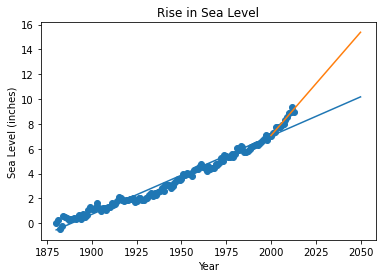

In [17]:
draw_plot()